# Illustrate Data

Here we illustrate the data associated with a Hitomi search for decaying dark matter, and projections for the upcoming XRISM instrument

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True

## Hitomi Limits

To begin with, we load the raw Hitomi limits, without applying any smoothing.

In [2]:
masses_hitomi=np.load("./data/masses_hitomi.npy")
TS_arr_hitomi=np.load("./data/TS_arr_hitomi.npy")
UL_power_hitomi=np.load("./data/UL_power_hitomi.npy")

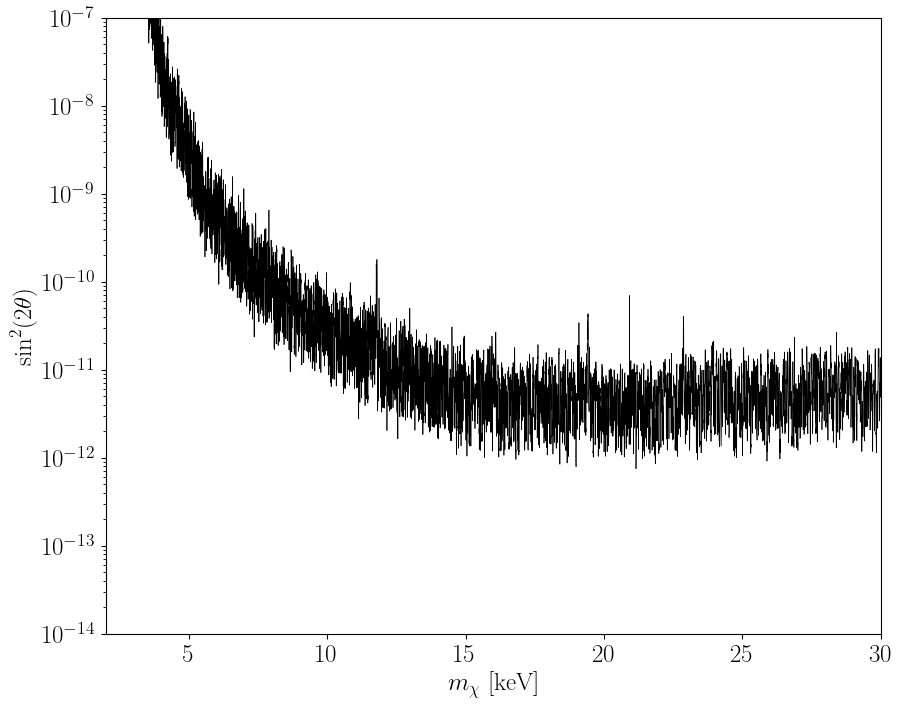

In [3]:
plt.figure(figsize=(10,8))
plt.plot(masses_hitomi,UL_power_hitomi,'k-',lw=0.5)
plt.xlim(2.,30.)
plt.yscale('log')
plt.ylim(1e-14,1e-7)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$m_\chi$ [keV]",fontsize=18)
plt.ylabel(r"$\sin^2(2\theta)$",fontsize=18)
plt.show()

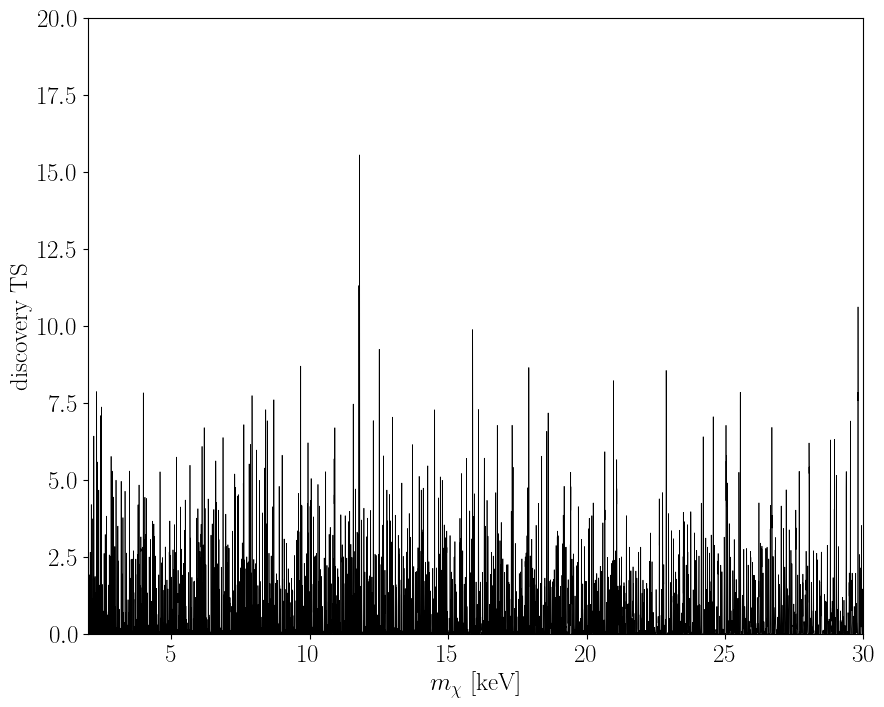

In [4]:
plt.figure(figsize=(10,8))
plt.plot(masses_hitomi,TS_arr_hitomi,'k-',lw=0.5)
plt.xlim(2.,30.)
plt.ylim(0.,20.)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$m_\chi$ [keV]",fontsize=18)
plt.ylabel(r"discovery TS",fontsize=18)
plt.show()

## Now let's plot the smoothed Hitomi limit and the XRISM projections

In [5]:
# Hitomi smoothed data
masses_hitomi_smooth=np.load("./data/masses_hitomi_smooth.npy")
UL_exp_hitomi_smooth=np.load("./data/UL_exp_hitomi_smooth.npy")
UL_L1_hitomi_smooth=np.load("./data/UL_L1_hitomi_smooth.npy")
UL_U1_hitomi_smooth=np.load("./data/UL_U1_hitomi_smooth.npy")
UL_U2_hitomi_smooth=np.load("./data/UL_U2_hitomi_smooth.npy") 
UL_power_hitomi_smooth=np.load("./data/UL_power_hitomi_smooth.npy")

# XRISM projections
masses_xrism=np.load("./data/masses_xrism.npy")
UL_exp_xrism=np.load("./data/UL_exp_xrism.npy")
UL_L1_xrism=np.load("./data/UL_L1_xrism.npy")
UL_U1_xrism=np.load("./data/UL_U1_xrism.npy")
UL_U2_xrism=np.load("./data/UL_U2_xrism.npy")

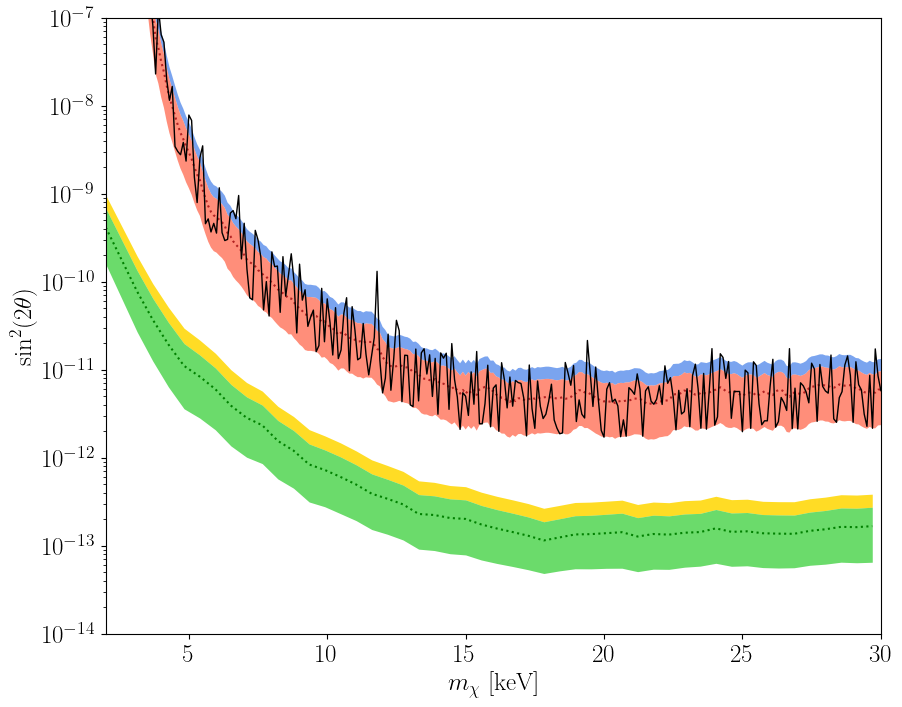

In [6]:
plt.figure(figsize=(10,8))
plt.fill_between(masses_hitomi_smooth,UL_U1_hitomi_smooth,UL_U2_hitomi_smooth,color="cornflowerblue",alpha=0.855,linewidth=0.)
plt.fill_between(masses_hitomi_smooth,UL_L1_hitomi_smooth,UL_U1_hitomi_smooth,color="tomato",alpha=0.72,linewidth=0.)
plt.plot(masses_hitomi_smooth,UL_exp_hitomi_smooth,color="firebrick",linestyle="dotted")
plt.plot(masses_hitomi_smooth,UL_power_hitomi_smooth,'k-',lw=1.)

plt.fill_between(masses_xrism,UL_U1_xrism,UL_U2_xrism,color="gold",alpha=0.855,linewidth=0.)
plt.fill_between(masses_xrism,UL_L1_xrism,UL_U1_xrism,color="limegreen",alpha=0.72,linewidth=0.)
plt.plot(masses_xrism,UL_exp_xrism,color="green",linestyle="dotted")


plt.xlim(2.,30.)
plt.yscale('log')
plt.ylim(1e-14,1e-7)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$m_\chi$ [keV]",fontsize=18)
plt.ylabel(r"$\sin^2(2\theta)$",fontsize=18)
plt.show()

## Convert from $\sin^2(2\theta)$ to lifetime or $g_{a\gamma\gamma}$

In [7]:
def theta2tau(s2theta, ms):
    """ Convert from ms [keV] and sin2theta to lifetime [s]
    """
    
    return 1./(1.361e-29*(s2theta/1.e-7)*ms**5.)

hbar = 6.582119569e-16 # [eV.s]

def theta2gagg(s2theta, ms):
    """ Convert from ms [keV] and sin2theta to gagg [1/GeV]
    """
    
    Gamma = hbar/theta2tau(s2theta, ms)/2. # [eV]
    
    return np.sqrt(64.*np.pi*Gamma/(ms*1.e3)**3.)*1.e9 # [1/GeV]

## Let's illustrate and example, going to gagg and to lifetime

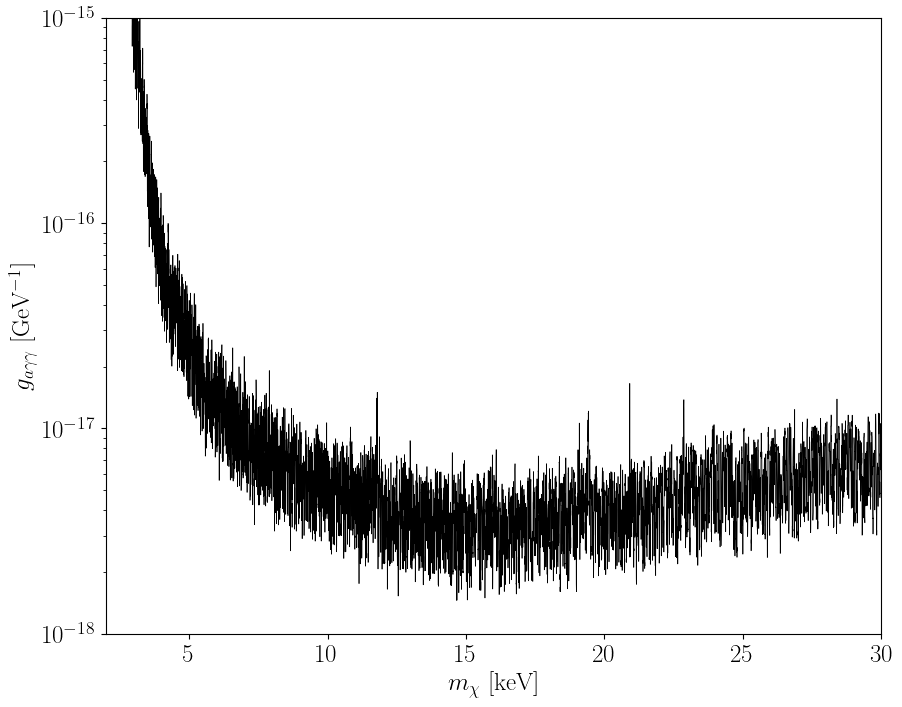

In [8]:
plt.figure(figsize=(10,8))
plt.plot(masses_hitomi,theta2gagg(UL_power_hitomi,masses_hitomi),'k-',lw=0.5)
plt.xlim(2.,30.)
plt.yscale('log')
plt.ylim(1e-18,1e-15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$m_\chi$ [keV]",fontsize=18)
plt.ylabel(r"$g_{a\gamma\gamma}$ [GeV$^{-1}$]",fontsize=18)
plt.show()

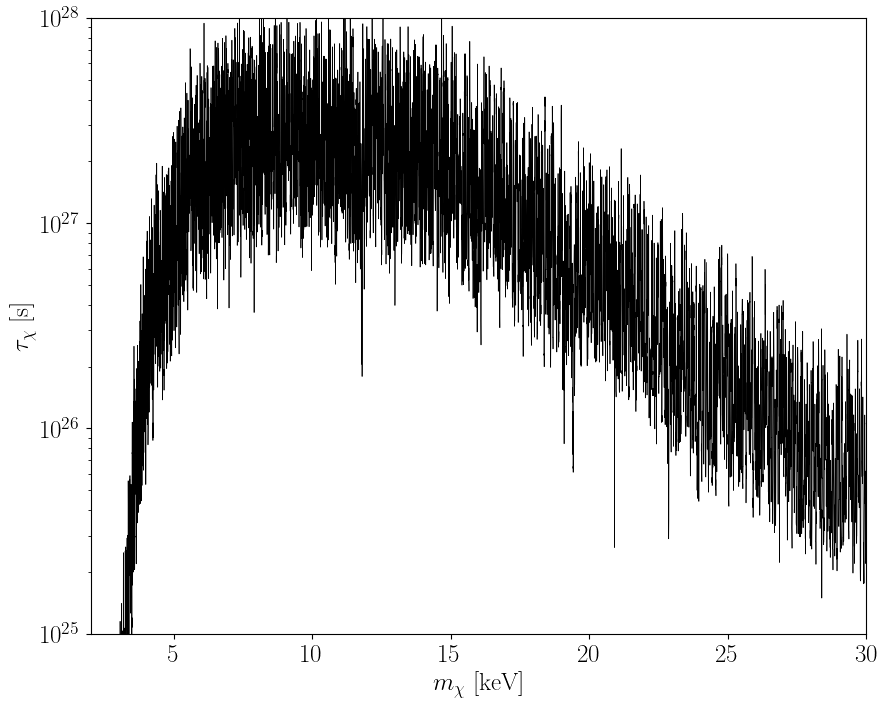

In [9]:
plt.figure(figsize=(10,8))
plt.plot(masses_hitomi,theta2tau(UL_power_hitomi,masses_hitomi),'k-',lw=0.5)
plt.xlim(2.,30.)
plt.yscale('log')
plt.ylim(1e25,1e28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$m_\chi$ [keV]",fontsize=18)
plt.ylabel(r"$\tau_\chi$ [s]",fontsize=18)
plt.show()